# **Introduction to Transformer Networks**

------

__Authors:__ Vincent Gurgul, Shih-Chi Ma, Iliyana Tarpova<br>
__Course:__ Information Systems Seminar<br>
__Lecturer:__ Prof. Dr. Stefan Lessmann<br>
__Semester:__ WS 2021/2022<br>
__Website:__ The data and the remaining notebooks are available through [GitHub](https://github.com/VincentGurgul/transformers)

<br>

---

# Table of Contents

**1. Previous Architectures**<br>
**2. Vaswani Transformer**<br>
&ensp;&ensp;&ensp;2.1 Architecture<br>
&ensp;&ensp;&ensp;2.2 Word Embedding<br>
&ensp;&ensp;&ensp;2.3 Positional Encoding<br>
&ensp;&ensp;&ensp;2.4 Multi-Headed Self-Attention<br>
**3. Implementing a Transformer**

<br>

---

# 1. Previous Architectures

Sequence to sequence (seq2seq) models which
map sequence input to sequence output have been
successful in natural language processing (NLP) tasks
such as speech recognition ([[Chorowski et al., 2015]](#References),
[[Bahdanau et al., 2016]](#References)), machine translation
([[Sutskever et al., 2014]](#References), [[Bahdanau et al., 2014]](#References)), text
summarization ([[Rush et al., 2015]](#References), [[Nallapati et al., 2016]](#References),
[[Nallapati et al., 2017]](#References)) and video captioning
[[Venugopalan et al., 2015]](#References). Before the introduction of
transformer models, the predominant approach is to encode
the input with a series of single- or mostly bi-directional
recurrent neural networks (RNN) and generates output with
another series of RNN which is a decoder in the model
structure [[Gehring et al., 2017]](#References). RNN-based encoder-
decoder models have the success linked to their ability
to capture unbounded context [[Dauphin et al., 2017]](#References), and
popular choices for RNN are long short term memory
networks (LSTM [[Hochreiter and Schmidhuber, 1997]](#References)) and
gated recurrent units (GRU [[Chung et al., 2014]](#References)).
However, due to its sequential nature, recurrent models tend to suffer
from low efficiency issues, with parallelization within training
phase being unfeasible, which becomes critical when the
input sequence length increases.

Therefore, with the aim of reducing sequential computation,
models based on convolutional neural networks (CNN) have
been proposed ([[Gehring et al., 2017]](#References), [[Dauphin et al., 2017],
[Yin and Pei, 2015]](#References)). Since CNNs do not rely on computations from previous time steps, parallelization during the training process is possible, which overcomes the challenge
RNNs address. Nevertheless, compared to RNNs, CNN-based
models require stacking layers on top of each other to model
large context sizes, and the number of operations grows
rapidly, which makes it difficult for the model to capture long-
term dependencies.

<br>

---

# 2. Vaswani Transformer

### 2.1 Architecture

- Encoder-Decoder structure: text is transformed into numeric values, numeric values are transformed back to text
- as opposed to RNNs the text is not processed sequentially, but simultaneously
- Therefore the Transformer isn’t able to recognize the word order, it has to be injected through positional encoding
- the heart of the network is the attention mechanism – it adds contextual meaning to the words by constructing relationships with the words surrounding it
- Furthermore the different attention heads allow the network to focus its attention on several different subsections of a text or a sentence
- in the original paper there were 8 attention heads
- Additionally both the encoder and decoder are stacked several times (6 in the original paper)


As previously explained, complex recurrent or convolutional neural networks with an encoder and a decoder are the most common sequence2sequence models. These models additionally use an attention mechanism to connect the encoder and decoder. The Transformer, proposed by [[Vaswani et al., 2017]](#Referneces) is a network architecture based purely on attention processes with no recurrence or convolutions, in which the entire sequence can be processed at once in a feed-forward manner.
The Transformer is a model architecture that foregoes recurrence in favour of drawing global dependencies between input and output wholly using an attention mechanism. The Transformer can achieve a new state of the art in translation quality by allowing for substantially higher parallelization. The Transformer is the first transduction model to calculate representations of its input and output using only self-attention rather than sequence aligned RNNs or convolution. The model is auto regressive at each phase, meaning that it uses previously created symbols as additional input to create the next.

The transformer is made up of two parts: an encoder and a decoder. They are multiple identical encoding and decoding blocks stacked on top of each other. The task of the encoder is to map an input sequence to a sequence of continuous representations, which is then fed into a decoder. The decoder receives the output of the encoder together with the decoder output at the previous time step, to generate an output sequence. [[Cristina, 2021]](#References) For both the encoder and decoder, the Transformer uses layered self-attention and completely connected layers.

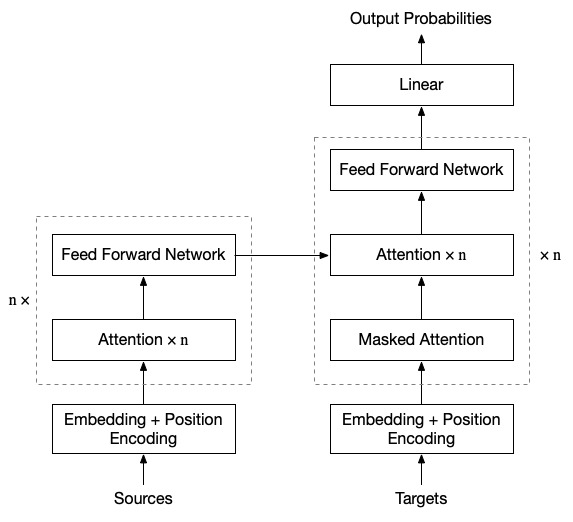


As seen on the figure above, the word embeddings of the input sequence are passed to the first encoder. These are then transformed and propagated to the next encoder. The output from the last encoder in the encoder-stack is passed to all the decoders in the decoder-stack as shown in the figure. [[Joshi, 2019]](#References)

**Encoder**: The encoder consists of 6 identical layers stacked on top of each other. Each layer is divided into two sub-layers
1.	a multi-head self-attention mechanism, where each head concentrates on a different type of information in different parts of the sentence. Meaning, that each head receives a different linearly projected version of the queries, keys, and values, which are all generated from the same input sequence X.  The output is then calculated in parallel.

2.	a fully connected feed-forward network consisting of two linear transformations with Rectified Linear Unit (ReLU) activation in between: 

$$ FFN(x) = ReLU(W_1 x + b_1) W_2 + b_2 $$

The six layers of the Transformer encoder apply the same linear transformations to all of the words in the input sequence, but each layer employs different weight $(W_1, W_2)$ and bias $(b_1, b_2)$ parameters to do so.
Furthermore, each of these two sublayers has an additional direct connection in the network that enables the gradient to bypass attention blocks, also known as residual connection. [[He et.al., 2016]](#References)
Each sublayer is also succeeded by a normalization layer, which normalizes the sum computed between the sublayer input X and the output generated by the sublayer itself,

$$ Layernorm(x + sublayer(x)) $$
[[Cristina, 2021]](#References)

**Decoder**: The decoder has a similar structure as the encoder and it also consists of 6 identical layers. However, each layer has three sub-layers. Two of them are comparable to those of the encoder, and the additional third sub-layer performs masked multi-head attention over the encoder stack's output. 
1.	The additional sub-layer, also referred to as encoder-decoder attention layer, uses masked attention, which means that the self-attention is modified to attend only to the preceding words. Furthermore, the output embeddings are offset by one position. Thanks to these two changes, the predictions for any position can only be based on the known outputs from the previous positions. The masking makes the decoder unidirectional (unlike the bidirectional encoder). [[Vasilev, 2019]](#References)

2.	The second sub-layer implements a multi-head self-attention mechanism. It takes the keys and values from the output of the encoder and uses the queries from the previous decoder sub-layer.

3.	The third sub-layer is a feed-forward network, following the pattern of the second sub-layer of the encoder.
Similar to the encoder, the three sub-layers on the decoder side also have residual connections around them and are succeeded by a normalization layer. The output of the decoder finally passes through a fully connected layer, followed by a SoftMax layer, to generate a prediction for the next word of the output sequence. [[Cristina, 2021]](#References)



**Simple representation of the Transformer architecture**


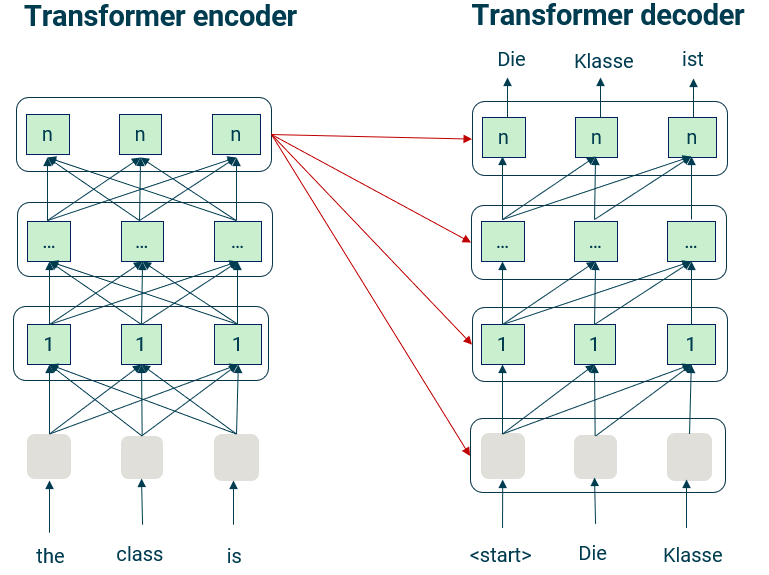

*Graph inspired by the lecture "Introduction to NLP" by Prof. Dr. Alan Akbik, Humboldt University, Berlin, Germany*

An important consideration to keep in mind is that the Transformer architecture cannot inherently capture any information about the relative positions of the words in the sequence, since it does not make use of recurrence. This information must be injected by introducing positional encodings to the input embeddings. The positional encoding vectors are of the same dimension as the input embeddings and are generated using sine and cosine functions of different frequencies. Then, they are simply summed to the input embeddings in order to inject the positional information. [[Cristina, 2021]](#References)




### 2.2 Word Embedding

- Each word is mapped to a vector, typically with several hundred dimensions (512 in the original paper, but anything from 100 to 1000 is common)
- The direction of the vector represents the meaning of the word
- Therefore, similar words should have smaller distance in the coordinate space
- The vector space is constructed on a large corpus of text, based on the typical context the words appear in

The encoder receives an input the output of the encoder right before it. The input of the first encoder in the stack, however, is represented by word embeddings. 
Word embedding is transforming words into numerical representations, which makes it easier to find similarities and dependencies between the parts of the input. It is done by tokenizing each word in a sequence and converting them into a dense, low dimensional vector space. Word embeddings aim to capture the semantic meaning of words in a sequence of text. [[Agarwal, 2021]](#References) The most important aspect of word embeddings is that semantically comparable words have a smaller distance between them and that similar words point in a similar direction. Apart from that, the word vector is be able to also represent some abstract information such as the syntactic and semantic relationships between words. On the figure below, we see that the two words "dog" and "cat" are relatively close to each other, because they both represent animals. What is more, their plural versions are in the same direction, showing that the semantics were captured by the embedding.

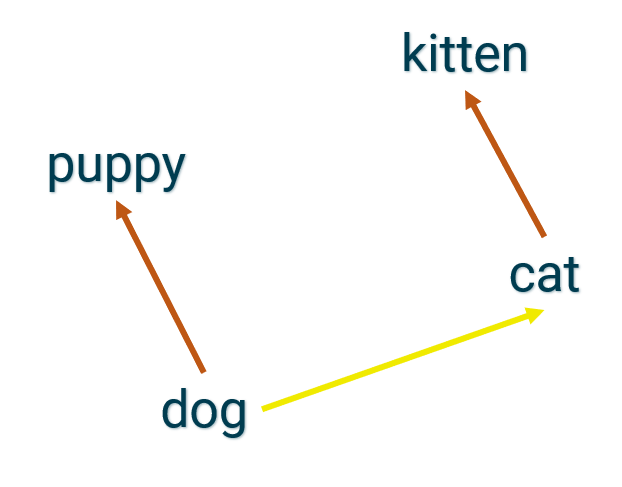

Word2vec (word to vector) utilizes a distributed representation of a word. Consider a vector with hundreds of dimensions, where each word is represented by a weighted distribution of those elements. So instead of a one-to-one mapping between an element in the vector and a word, the representation of a word is spread across all of the elements in the vector, and each element in the vector contributes to the definition of many words. [[Colyer, 2016]](#References)
In the example below you can find a hypothetical word vector. It has the unusually expressive ability to capture the meaning of every single word the relationships between them.

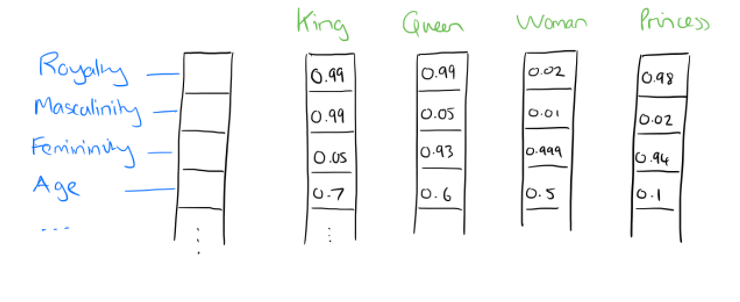

There are multiple options for dealing with weight matrices. One option is to initialize it with pre-trained embeddings and keep it fixed, in which case it’s really just a lookup table. Another option is to initialize it randomly, or with pre-trained embeddings, but keep it trainable. In that case the word representations will get refined and modified throughout training because the weight matrix will get refined and modified throughout training.
One way to use word embeddings is to initialize a weight matrix with pre-trained embeddings, which were trained on large datasets. The Transformer, however, uses a random initialization of the weight matrix and refines these weights during training – i.e., it learns its own word embeddings. [[Colyer, 2016]](#References)

However, since the encoder receives all the input sequence at once, it is not able to “understand” the word order. For that reason, we need something that captures the place of a word in the sequence: positional encodings.


### 2.3 Positional Encoding

As the transformer network processes all words simultaneously, we must inject some information about the relative or absolute position to make use of the word order. This should happen after the word embedding and before the first encoder / decoder block.

The first way to do this, that comes to mind, is simply adding the word position $n$ as another dimension to the word embedding vectors. However, as the values of the word embeddings are usually bound within a narrow range, this would put too much importance on the position dimension for high positions. It is necesarry that the positional information is also bound.

One way to achieve this would be to use $1/n$. However, this would result in vanishing positional information for high positions. Another function one might consider is the Softmax function. It is bound between 0 and 1 and it displays a great deal of positional information in its middle part where the gradient is the steepest. However, independently of how one sets it up, the positional information will vanish for either very low or very high positions.

The solution that [[Vaswani et al., 2017]](#References) came up with is inspired by Fourier theory — they decided to use sinusoids of varying frequencies. Sinusoids, i.e. sine and cosine functions, are bound between $-1$ and $1$ and they repeat indefinitely, so they reflect the same amount of positional information for every position.

However, because they repeat, several positions may have the same value for each sinusoid. To achieve a unique positional representation the authors have decided not to attach the positional information as an additional dimension, but to add it up to every one of the 512 dimensions of the word vector. For each dimension, they used a different frequency and they alternated between sine and cosine functions, thereby creating a specific unique 512-dimensional vector for each position.

<div>
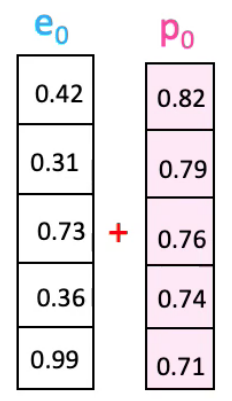
</div>

The positional vectors have the same dimension as the word embeddings. The positional encoding can be thought of as a nudge in each dimenstion in the 512-dimensional vector space. The intuition being: If the word embeddings reflect the meaning of the word, then the positional vector reflects the meaning of the position. Together they create the positionally encoded embeddings for each word.

The functions for the sinusoids look as follows:

$$ PE_{(pos,2i)}=sin({pos \over 10000^{2i/dmodel}}) $$

$$ PE_{(pos,2i+1)}=cos({pos \over 10000^{2i/dmodel}}) $$

For each even dimenstion, the sine function is applied while for each odd dimension it is the cosine function. The wavelengths form a geometric progression from $2π$ to $10000⋅2π$.


In [ ]:
import math
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.autograd import Variable

class PositionalEncoding(nn.Module):

    def __init__(self, d_model, dropout, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        
        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) *
                             -(math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)
        
    def forward(self, x):
        x = x + Variable(self.pe[:, :x.size(1)], 
                         requires_grad=False)
        return self.dropout(x)

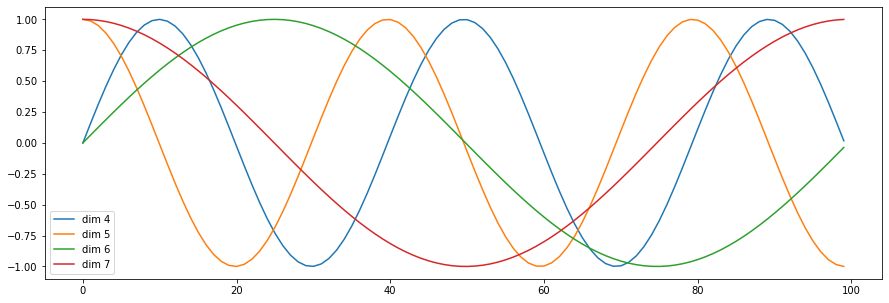

In [ ]:
plt.figure(figsize=(15, 5))
pe = PositionalEncoding(20, 0)
y = pe.forward(Variable(torch.zeros(1, 100, 20)))
plt.plot(np.arange(100), y[0, :, 4:8].data.numpy())
plt.legend(["dim %d"%p for p in [4,5,6,7]])
None

As you can see displayed in the plot above, the functions alternate between sine and cosine and the wavelength increases with each dimension. This allows the network to attend to positional information for an infinite amount of positions (theoretically, given enough computational resources) without any loss of precision.

E.g. for a word at position 20, the green function is above the red, red is above blue and blue is above orange. For position 60, even though the orange function is also at $-1$, now the blue one is above the green and green above red, making it distinctly different.

The authors also experimented with using learned positional embeddings instead, but found that the two versions produced nearly identical results. They chose the sinusoidal version because this approach allows the model to extrapolate to higher positions than the longest sequence length encountered during training. Besides that, is it significantly faster to compute.


### 2.4 Multi-Headed Self-Attention

The heart of the Transformer network is the attention mechanism, which was first introduced in 2014. [[Bahdanau et al., 2014]](#References) The concept behind the attention mechanism is that it enables the model to attend only to parts of the input sequence by selectively aggregating those, that are most relevant to the current prediction. To get an intuitive understanding why this is useful in the context of natural language processing, take a look at the example below.

<div>
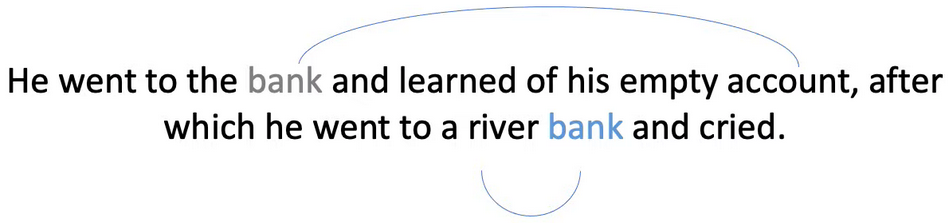
</div>

*Image credit to: [[Visual Guide to Transformer Neural Networks, 2020]](#References)*

In this sentence the word “bank” has two very different meanings. The difference is not based on the position though, but on the context, in this case primarily on the words “account” and “river”. In order to capture this difference in meaning of a word we need to construct relationships with the words surrounding it. This is exactly what the self-attention mechanism does.

Below, the output of one attention head is shown. You can see that it draws a relationship between the word “it” and “the animal” in the sentence “The animal didn't cross the street because it was too tired”. Note however, that there are 8 attention heads in each self-attention block that can each focus on a different part of a sentence.

<div>
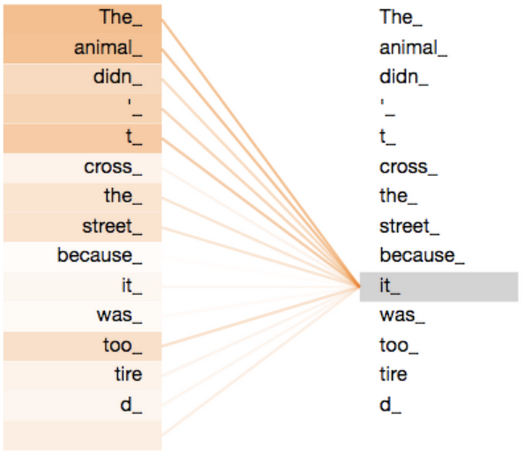
</div>

*Image credit to: [[Alammar, 2018]](#References)*

To visualize here is an example from computer vision. You can imagine the output of the attention heads like a filter that is being applied over the original input. Each attention head filters a different section of the sentence that is interrelated. In this visual example that is the women, the clouds and the rocks in the background. It’s the individual sections that are then being fed into a classic feed-forward neural network.

<div>
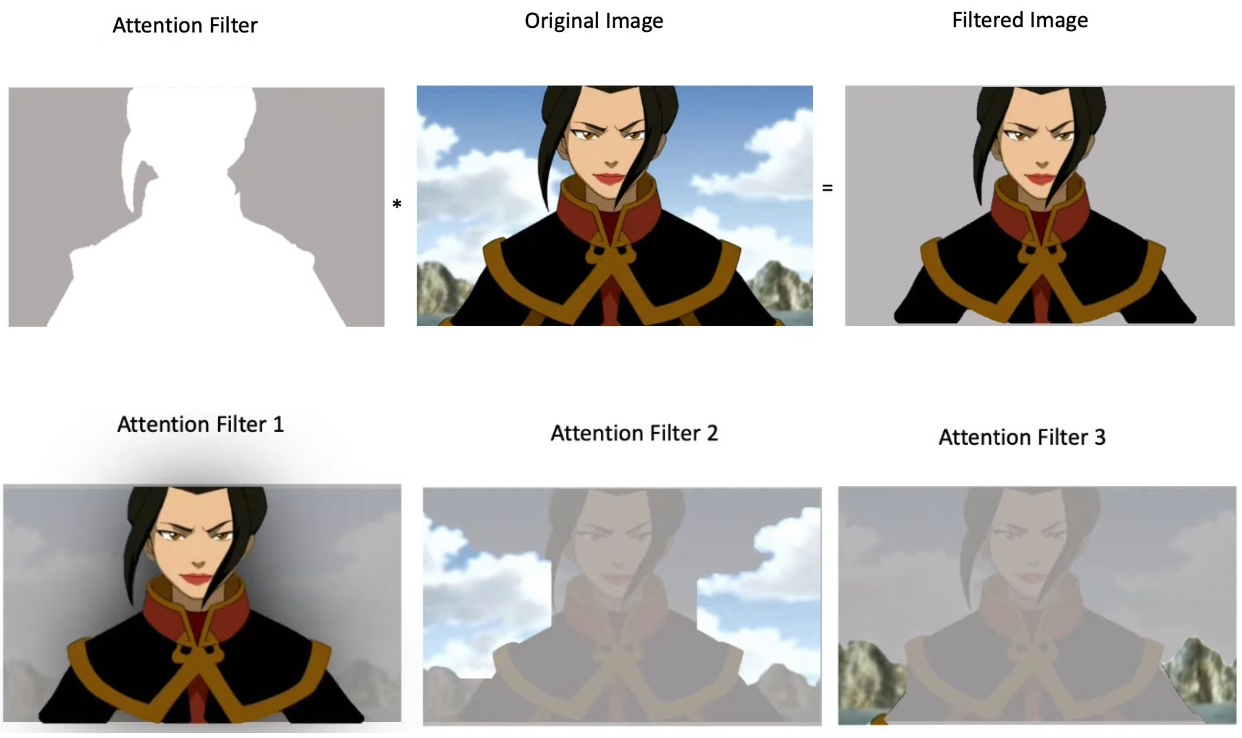
</div>

*Image credit to: [[Visual Guide to Transformer Neural Networks, 2020]](#References)*

Let's now take a closer look at what is going on inside of each attention head mathematically. Three identical copies of the embedded and positionally encoded sentence matrices are being passed into linear layers. Those copies are called query, key and value (Q, K, V) matrices, relating to how search engines worked back in the day. After being transformed by the linear layer, the query and key matrices are multiplied with each other to produce the attention matrix.

<div>
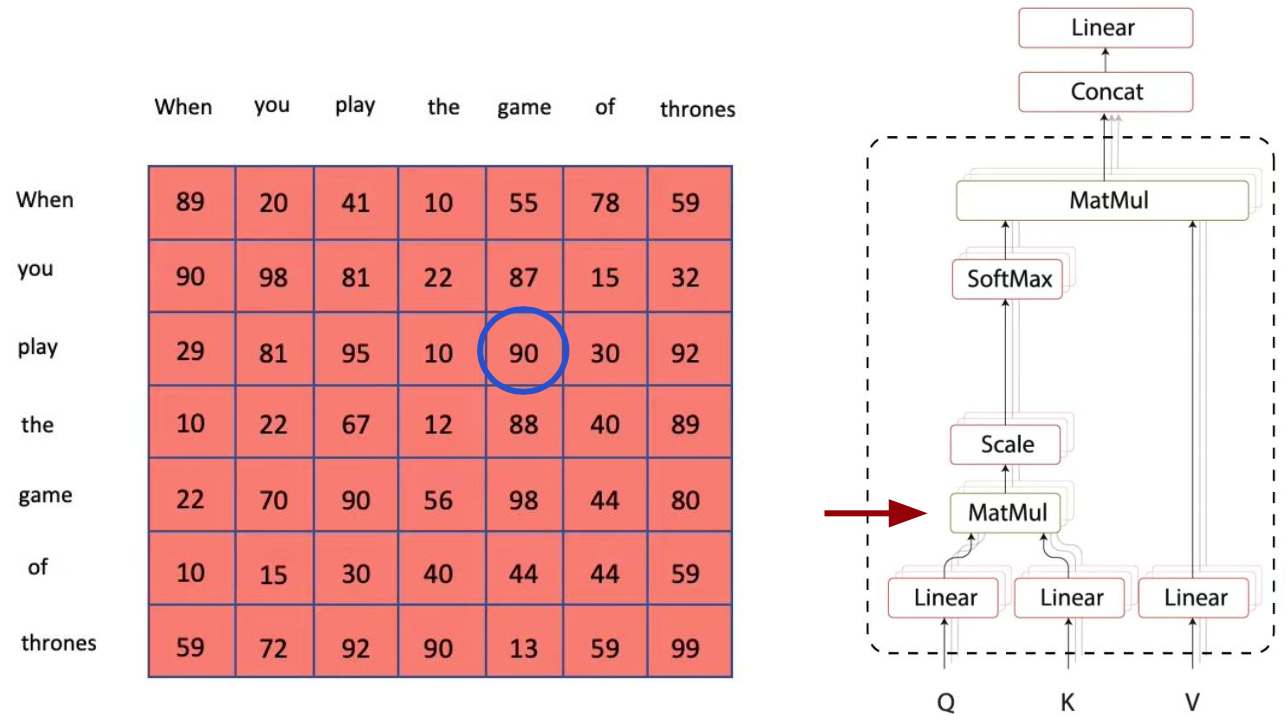
</div>

*Image credit to: [[Visual Guide to Transformer Neural Networks, 2020]](#References)*

This is how the attention score matrix might look after training. One can see that this particular attention head reveals a presumed relationship between the words “play” and “game” by giving it a score of 90.

These attention scores are not bound though and still depend on the dimension of the matrix. The scores are therefore scaled down by the dimension and the softmax function is applied, transforming the scores into “attention probabilities” between 0 and 1.

<div>
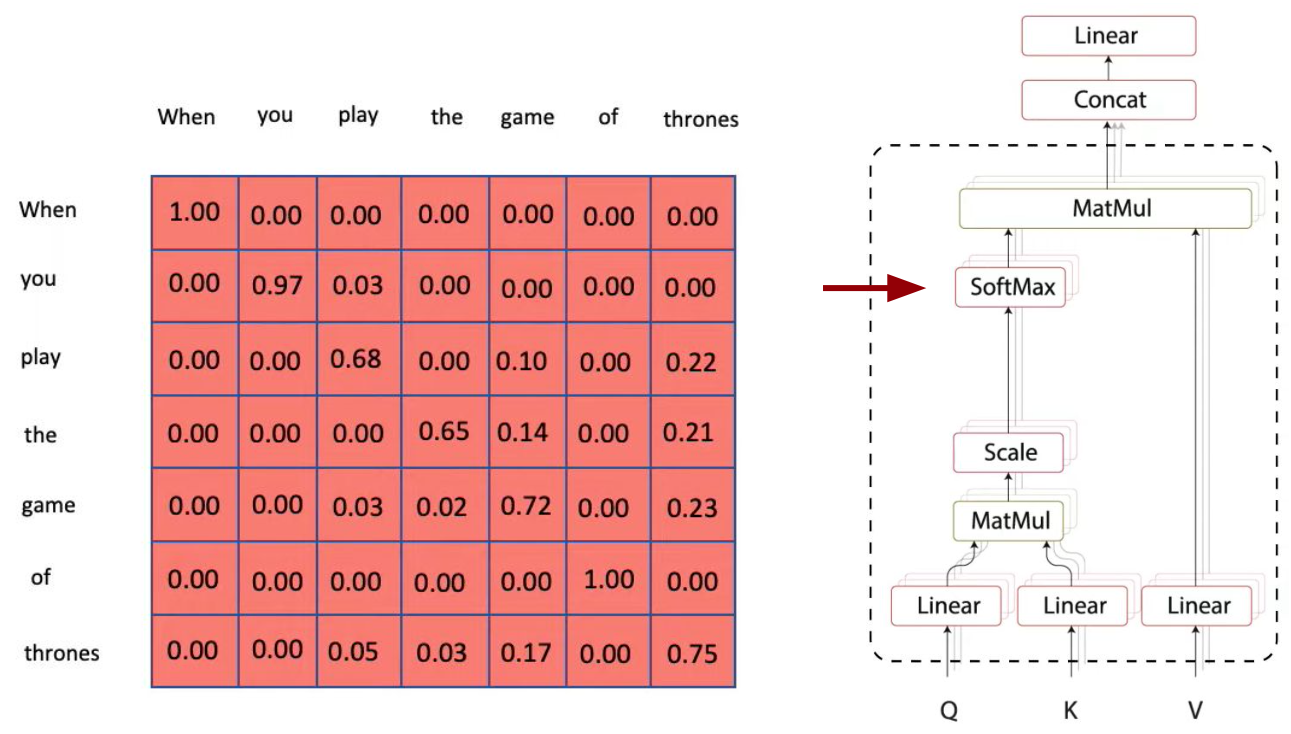
</div>

*Image credit to: [[Visual Guide to Transformer Neural Networks, 2020]](#References)*

These probabilities now function like the aforementioned attention filter and are multiplied with the value vectors to create the filtered sentence matrix. The resulting matrices of each attention head are concatenated together and go through another linear layer to produce one single matrix with the same dimensionality as the input matrices.

<br>

---

# 3. Implementing a Transformer

In the following section we implement a transformer network from scratch in tensorflow, in order for you to see how the ideas we just presented look like as python code. The network will have the task of translating from German to English and will be trained on a dataset of German-English sentence pairs from the [Tatoeba](https://tatoeba.org/) project.

Tatoeba is a collbaorative platform where everyone can add sentences and their translation in a certain language. The resulting sentence pairs can be downloaded as an open-source dataset. The advantage of the Tatoeba dataset is that one phrase may have different translations from different users. The main disadvantage is that most sentences are short, because collaborators usually do not tend to think of very long sentences when adding entries. We will see how this becomes a problem later on.


When running this code in colab, ensure that you run it with a GPU as hardware accelerator. To enable this:
- Navigate to Edit → Notebook Settings
- select GPU from the Hardware Accelerator drop-down

We will be using Python 3.7

In [ ]:
!sudo update-alternatives --set python3 /usr/bin/python3.7

In [ ]:
!python3 --version

Python 3.7.12


Install and load required packages

In [ ]:
!pip install d2l==0.17.1 

In [ ]:
import re
import sys
import numpy as np
import tensorflow as tf
from d2l import tensorflow as d2l
from google.colab import drive

Mount the drive (if you're using Colab) and please make sure that you upload the file "sentence_pairs_for_nmt.txt" into the same as directory as this notebook

In [ ]:
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive')

Mounted at /content/drive


Load German-English sentence pairs

In [ ]:
def read_data(name):
    with open('/content/drive/MyDrive/' + name, 'r') as f:
        return f.read()

raw_text = read_data('sentence_pairs_for_nmt.txt')

It should show roughly 1.2 million sentence pairs

In [ ]:
len(raw_text.splitlines())

1248310

Set up the transformer network

In [ ]:
def preprocess_nmt(text):
    ''' Preprocess the dataset. '''

    def no_space(char, prev_char):
        return char in set(',.!?') and prev_char != ' '

    # Replace non-breaking space with space, and convert uppercase letters to
    # lowercase ones
    text = text.replace('\u202f', ' ').replace('\xa0', ' ').lower()
    # Insert space between words and punctuation marks
    out = [' ' + char if i > 0 and no_space(char, text[i - 1]) else char
           for i, char in enumerate(text)]
    return ''.join(out)


def tokenize_nmt(text, num_examples=None):
    ''' Tokenize the dataset. '''

    source, target = [], []
    for i, line in enumerate(text.split('\n')):
        if num_examples and i > num_examples:
            break
        parts = line.split('\t')
        if len(parts) == 2:
            source.append(parts[1].split(' '))
            target.append(parts[0].split(' '))
    return source, target


def truncate_pad(line, num_steps, padding_token):
    ''' Truncate or pad sequences. '''

    if len(line) > num_steps:
        return line[:num_steps]  # Truncate
    return line + [padding_token] * (num_steps - len(line))  # Pad


def build_array_nmt(lines, vocab, num_steps):
    ''' Transform text sequences of machine translation into minibatches. '''

    lines = [vocab[l] for l in lines]
    lines = [l + [vocab['<eos>']] for l in lines]
    array = tf.constant([truncate_pad(
        l, num_steps, vocab['<pad>']) for l in lines])
    valid_len = tf.reduce_sum(
        tf.cast(array != vocab['<pad>'], tf.int32), 1)
    return array, valid_len


def load_array(data_arrays, batch_size, is_train=True):
    '''Construct a TensorFlow data iterator. '''

    dataset = tf.data.Dataset.from_tensor_slices(data_arrays)
    if is_train:
        dataset = dataset.shuffle(buffer_size=1000)
    dataset = dataset.batch(batch_size)
    return dataset


def load_data_nmt(raw_text, batch_size, num_steps, num_examples=600):
    ''' Return the iterator and the vocabularies of the translation dataset. '''

    text = preprocess_nmt(raw_text)
    source, target = tokenize_nmt(text, num_examples)
    src_vocab = d2l.Vocab(source, min_freq=2,
                          reserved_tokens=['<pad>', '<bos>', '<eos>'])
    tgt_vocab = d2l.Vocab(target, min_freq=2,
                          reserved_tokens=['<pad>', '<bos>', '<eos>'])
    src_array, src_valid_len = build_array_nmt(source, src_vocab, num_steps)
    tgt_array, tgt_valid_len = build_array_nmt(target, tgt_vocab, num_steps)
    data_arrays = (src_array, src_valid_len, tgt_array, tgt_valid_len)
    data_iter = load_array(data_arrays, batch_size)
    return data_iter, src_vocab, tgt_vocab


class DotProductAttention(tf.keras.layers.Layer):
    ''' Scaled dot product attention. '''

    def __init__(self, dropout, **kwargs):
        super().__init__(**kwargs)
        self.dropout = tf.keras.layers.Dropout(dropout)

    # Shape of `queries`: (`batch_size`, no. of queries, `d`)
    # Shape of `keys`: (`batch_size`, no. of key-value pairs, `d`)
    # Shape of `values`: (`batch_size`, no. of key-value pairs, value
    # dimension)
    # Shape of `valid_lens`: (`batch_size`,) or (`batch_size`, no. of queries)
    def call(self, queries, keys, values, valid_lens, **kwargs):
        d = queries.shape[-1]
        scores = tf.matmul(queries, keys, transpose_b=True)/tf.math.sqrt(
            tf.cast(d, dtype=tf.float32))
        self.attention_weights = d2l.masked_softmax(scores, valid_lens)
        return tf.matmul(self.dropout(self.attention_weights, **kwargs), values)
        

class MultiHeadAttention(tf.keras.layers.Layer):
    ''' Multi-head attention. '''

    def __init__(self, key_size, query_size, value_size, num_hiddens,
                 num_heads, dropout, bias=False, **kwargs):
        super().__init__(**kwargs)
        self.num_heads = num_heads
        self.attention = DotProductAttention(dropout)
        self.W_q = tf.keras.layers.Dense(num_hiddens, use_bias=bias)
        self.W_k = tf.keras.layers.Dense(num_hiddens, use_bias=bias)
        self.W_v = tf.keras.layers.Dense(num_hiddens, use_bias=bias)
        self.W_o = tf.keras.layers.Dense(num_hiddens, use_bias=bias)

    def call(self, queries, keys, values, valid_lens, **kwargs):
        # Shape of `queries`, `keys`, or `values`:
        # (`batch_size`, no. of queries or key-value pairs, `num_hiddens`)
        # Shape of `valid_lens`:
        # (`batch_size`,) or (`batch_size`, no. of queries)
        # After transposing, shape of output `queries`, `keys`, or `values`:
        # (`batch_size` * `num_heads`, no. of queries or key-value pairs,
        # `num_hiddens` / `num_heads`)
        queries = transpose_qkv(self.W_q(queries), self.num_heads)
        keys = transpose_qkv(self.W_k(keys), self.num_heads)
        values = transpose_qkv(self.W_v(values), self.num_heads)

        if valid_lens is not None:
            # On axis 0, copy the first item (scalar or vector) for
            # `num_heads` times, then copy the next item, and so on
            valid_lens = tf.repeat(valid_lens, repeats=self.num_heads, axis=0)

        # Shape of `output`: (`batch_size` * `num_heads`, no. of queries,
        # `num_hiddens` / `num_heads`)
        output = self.attention(queries, keys, values, valid_lens, **kwargs)

        # Shape of `output_concat`: (`batch_size`, no. of queries,
        # `num_hiddens`)
        output_concat = transpose_output(output, self.num_heads)
        return self.W_o(output_concat)


def transpose_qkv(X, num_heads):
    ''' Transposition for parallel computation of multiple attention heads. '''

    # Shape of input `X`:
    # (`batch_size`, no. of queries or key-value pairs, `num_hiddens`).
    # Shape of output `X`:
    # (`batch_size`, no. of queries or key-value pairs, `num_heads`,
    # `num_hiddens` / `num_heads`)
    X = tf.reshape(X, shape=(X.shape[0], X.shape[1], num_heads, -1))

    # Shape of output `X`:
    # (`batch_size`, `num_heads`, no. of queries or key-value pairs,
    # `num_hiddens` / `num_heads`)
    X = tf.transpose(X, perm=(0, 2, 1, 3))

    # Shape of `output`:
    # (`batch_size` * `num_heads`, no. of queries or key-value pairs,
    # `num_hiddens` / `num_heads`)
    return tf.reshape(X, shape=(-1, X.shape[2], X.shape[3]))


def transpose_output(X, num_heads):
    ''' Reverse the operation of `transpose_qkv`. '''

    X = tf.reshape(X, shape=(-1, num_heads, X.shape[1], X.shape[2]))
    X = tf.transpose(X, perm=(0, 2, 1, 3))
    return tf.reshape(X, shape=(X.shape[0], X.shape[1], -1))


class PositionalEncoding(tf.keras.layers.Layer):
    ''' Positional encoding. '''

    def __init__(self, num_hiddens, dropout, max_len=1000):
        super().__init__()
        self.dropout = tf.keras.layers.Dropout(dropout)
        # Create a long enough `P`
        self.P = np.zeros((1, max_len, num_hiddens))
        X = np.arange(max_len, dtype=np.float32).reshape(
            -1,1)/np.power(10000, np.arange(
            0, num_hiddens, 2, dtype=np.float32) / num_hiddens)
        self.P[:, :, 0::2] = np.sin(X)
        self.P[:, :, 1::2] = np.cos(X)


class PositionWiseFFN(tf.keras.layers.Layer):
    ''' Positionwise feed-forward network. '''

    def __init__(self, ffn_num_hiddens, ffn_num_outputs, **kwargs):
        super().__init__(*kwargs)
        self.dense1 = tf.keras.layers.Dense(ffn_num_hiddens)
        self.relu = tf.keras.layers.ReLU()
        self.dense2 = tf.keras.layers.Dense(ffn_num_outputs)

    def call(self, X):
        return self.dense2(self.relu(self.dense1(X)))


class AddNorm(tf.keras.layers.Layer):
    ''' Residual connection followed by layer normalization. '''

    def __init__(self, normalized_shape, dropout, **kwargs):
        super().__init__(**kwargs)
        self.dropout = tf.keras.layers.Dropout(dropout)
        self.ln = tf.keras.layers.LayerNormalization(normalized_shape)

    def call(self, X, Y, **kwargs):
        return self.ln(self.dropout(Y, **kwargs) + X)


class EncoderBlock(tf.keras.layers.Layer):
    ''' Transformer encoder block. '''

    def __init__(self, key_size, query_size, value_size, num_hiddens,
                 norm_shape, ffn_num_hiddens, num_heads, dropout, bias=False, **kwargs):
        super().__init__(**kwargs)
        self.attention = MultiHeadAttention(key_size, query_size, value_size, num_hiddens,
                                            num_heads, dropout, bias)
        self.addnorm1 = AddNorm(norm_shape, dropout)
        self.ffn = PositionWiseFFN(ffn_num_hiddens, num_hiddens)
        self.addnorm2 = AddNorm(norm_shape, dropout)

    def call(self, X, valid_lens, **kwargs):
        Y = self.addnorm1(X, self.attention(
            X, X, X, valid_lens, **kwargs), **kwargs)
        return self.addnorm2(Y, self.ffn(Y), **kwargs)


class TransformerEncoder(tf.keras.layers.Layer):
    ''' Transformer encoder. '''

    def __init__(self, vocab_size, key_size, query_size, value_size,
                 num_hiddens, norm_shape, ffn_num_hiddens, num_heads,
                 num_layers, dropout, bias=False, **kwargs):
        super().__init__(**kwargs)
        self.num_hiddens = num_hiddens
        self.embedding = tf.keras.layers.Embedding(vocab_size, num_hiddens)
        self.pos_encoding = PositionalEncoding(num_hiddens, dropout)
        self.blks = [EncoderBlock(
            key_size, query_size, value_size, num_hiddens, norm_shape,
            ffn_num_hiddens, num_heads, dropout, bias) for _ in range(
            num_layers)]

    def call(self, X, valid_lens, **kwargs):
        # Since positional encoding values are between -1 and 1, the embedding
        # values are multiplied by the square root of the embedding dimension
        # to rescale before they are summed up
        X = self.pos_encoding(self.embedding(X) * tf.math.sqrt(
            tf.cast(self.num_hiddens, dtype=tf.float32)), **kwargs)
        self.attention_weights = [None] * len(self.blks)
        for i, blk in enumerate(self.blks):
            X = blk(X, valid_lens, **kwargs)
            self.attention_weights[
                i] = blk.attention.attention.attention_weights
        return X


class DecoderBlock(tf.keras.layers.Layer):
    # The `i`-th block in the decoder
    def __init__(self, key_size, query_size, value_size, num_hiddens,
                 norm_shape, ffn_num_hiddens, num_heads, dropout, i, **kwargs):
        super().__init__(**kwargs)
        self.i = i
        self.attention1 = MultiHeadAttention(
            key_size, query_size, value_size, num_hiddens, num_heads, dropout)
        self.addnorm1 = AddNorm(norm_shape, dropout)
        self.attention2 = MultiHeadAttention(
            key_size, query_size, value_size, num_hiddens, num_heads, dropout)
        self.addnorm2 = AddNorm(norm_shape, dropout)
        self.ffn = PositionWiseFFN(ffn_num_hiddens, num_hiddens)
        self.addnorm3 = AddNorm(norm_shape, dropout)

    def call(self, X, state, **kwargs):
        enc_outputs, enc_valid_lens = state[0], state[1]
        # During training, all the tokens of any output sequence are processed
        # at the same time, so `state[2][self.i]` is `None` as initialized.
        # When decoding any output sequence token by token during prediction,
        # `state[2][self.i]` contains representations of the decoded output at
        # the `i`-th block up to the current time step
        if state[2][self.i] is None:
            key_values = X
        else:
            key_values = tf.concat((state[2][self.i], X), axis=1)
        state[2][self.i] = key_values
        if kwargs["training"]:
            batch_size, num_steps, _ = X.shape
            # Shape of `dec_valid_lens`: (`batch_size`, `num_steps`), where
            # every row is [1, 2, ..., `num_steps`]
            dec_valid_lens = tf.repeat(tf.reshape(tf.range(1, num_steps + 1),
                                                  shape=(-1, num_steps)), repeats=batch_size, axis=0)

        else:
            dec_valid_lens = None

        # Self-attention
        X2 = self.attention1(X, key_values, key_values,
                             dec_valid_lens, **kwargs)
        Y = self.addnorm1(X, X2, **kwargs)
        # Encoder-decoder attention. Shape of `enc_outputs`: (`batch_size`, `num_steps`, `num_hiddens`)
        Y2 = self.attention2(Y, enc_outputs, enc_outputs,
                             enc_valid_lens, **kwargs)
        Z = self.addnorm2(Y, Y2, **kwargs)
        return self.addnorm3(Z, self.ffn(Z), **kwargs), state


class TransformerDecoder(tf.keras.layers.Layer):
    ''' Transformer decoder. '''

    def __init__(self, vocab_size, key_size, query_size, value_size,
                 num_hiddens, norm_shape, ffn_num_hiddens, num_heads, num_layers, dropout, **kwargs):
        super().__init__(**kwargs)
        self.num_hiddens = num_hiddens
        self.num_layers = num_layers
        self.embedding = tf.keras.layers.Embedding(vocab_size, num_hiddens)
        self.pos_encoding = PositionalEncoding(num_hiddens, dropout)
        self.blks = [DecoderBlock(key_size, query_size, value_size, num_hiddens, norm_shape,
                                  ffn_num_hiddens, num_heads, dropout, i) for i in range(num_layers)]
        self.dense = tf.keras.layers.Dense(vocab_size)

    def init_state(self, enc_outputs, enc_valid_lens, *args):
        return [enc_outputs, enc_valid_lens, [None] * self.num_layers]

    def call(self, X, state, **kwargs):
        X = self.pos_encoding(self.embedding(
            X) * tf.math.sqrt(tf.cast(self.num_hiddens, dtype=tf.float32)), **kwargs)
        # 2 Attention layers in decoder
        self._attention_weights = [[None] * len(self.blks) for _ in range(2)]
        for i, blk in enumerate(self.blks):
            X, state = blk(X, state, **kwargs)
            # Decoder self-attention weights
            self._attention_weights[0][i] = blk.attention1.attention.attention_weights
            # Encoder-decoder attention weights
            self._attention_weights[1][i] = blk.attention2.attention.attention_weights
        return self.dense(X), state

    @property
    def attention_weights(self):
        return self._attention_weights


class EncoderDecoder(tf.keras.Model):
    ''' Class for the encoder-decoder architecture. '''

    def __init__(self, encoder, decoder, **kwargs):
        super(EncoderDecoder, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, enc_X, dec_X, *args, **kwargs):
        enc_outputs = self.encoder(enc_X, *args, **kwargs)
        dec_state = self.decoder.init_state(enc_outputs, *args)
        return self.decoder(dec_X, dec_state, **kwargs)


def train_model(net, data_iter, lr, num_epochs, tgt_vocab, device):
    '''Train a sequence to sequence model. '''

    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    animator = d2l.Animator(xlabel="epoch", ylabel="loss",
                            xlim=[10, num_epochs])
    for epoch in range(num_epochs):
        timer = d2l.Timer()
        metric = d2l.Accumulator(2)  # Sum of training loss, no. of tokens
        for batch in data_iter:
            X, X_valid_len, Y, Y_valid_len = [x for x in batch]
            bos = tf.reshape(tf.constant([tgt_vocab['<bos>']] * Y.shape[0]),
                             shape=(-1, 1))
            dec_input = tf.concat([bos, Y[:, :-1]], 1)  # Teacher forcing
            with tf.GradientTape() as tape:
                Y_hat, _ = net(X, dec_input, X_valid_len, training=True)
                l = d2l.MaskedSoftmaxCELoss(Y_valid_len)(Y, Y_hat)
            gradients = tape.gradient(l, net.trainable_variables)
            gradients = d2l.grad_clipping(gradients, 1)
            optimizer.apply_gradients(zip(gradients, net.trainable_variables))
            num_tokens = tf.reduce_sum(Y_valid_len).numpy()
            metric.add(tf.reduce_sum(l), num_tokens)
        if (epoch + 1) % 10 == 0:
            animator.add(epoch + 1, (metric[0] / metric[1],))
    print(f'loss {metric[0] / metric[1]:.3f}, {metric[1] / timer.stop():.1f} '
          f'tokens/sec on {str(device)}')

Set hyperparameters and train the model

loss 0.024, 797.5 tokens/sec on <tensorflow.python.eager.context._EagerDeviceContext object at 0x7f00ab014190>


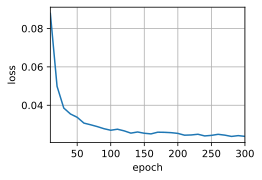

In [ ]:
num_hiddens, num_layers, dropout, batch_size, num_steps = 32, 2, 0.1, 64, 10
lr, num_epochs, device = 0.005, 300, d2l.try_gpu()
ffn_num_hiddens, num_heads = 64, 4
key_size, query_size, value_size = 32, 32, 32
norm_shape = [2]

train_iter, src_vocab, tgt_vocab = load_data_nmt(raw_text, batch_size, num_steps)
encoder = TransformerEncoder(
    len(src_vocab), key_size, query_size, value_size, num_hiddens, norm_shape,
    ffn_num_hiddens, num_heads, num_layers, dropout)
decoder = TransformerDecoder(
    len(tgt_vocab), key_size, query_size, value_size, num_hiddens, norm_shape,
    ffn_num_hiddens, num_heads, num_layers, dropout)
net = EncoderDecoder(encoder, decoder)

train_model(net, train_iter, lr, num_epochs, tgt_vocab, device)

Now, lets translate a couple of test sentences to see how the model performs

In [ ]:
def translate(net, src_sentence, src_vocab, tgt_vocab, num_steps,
                    save_attention_weights=False):
    '''Predict for sequence to sequence. '''

    src_tokens = src_vocab[src_sentence.lower().split(' ')] + [
        src_vocab['<eos>']]
    enc_valid_len = tf.constant([len(src_tokens)])
    src_tokens = d2l.truncate_pad(src_tokens, num_steps, src_vocab['<pad>'])
    # Add the batch axis
    enc_X = tf.expand_dims(src_tokens, axis=0)
    enc_outputs = net.encoder(enc_X, enc_valid_len, training=False)
    dec_state = net.decoder.init_state(enc_outputs, enc_valid_len)
    # Add the batch axis
    dec_X = tf.expand_dims(tf.constant([tgt_vocab['<bos>']]), axis=0)
    output_seq, attention_weight_seq = [], []
    for _ in range(num_steps):
        Y, dec_state = net.decoder(dec_X, dec_state, training=False)
        # We use the token with the highest prediction likelihood as the input
        # of the decoder at the next time step
        dec_X = tf.argmax(Y, axis=2)
        pred = tf.squeeze(dec_X, axis=0)
        # Save attention weights
        if save_attention_weights:
            attention_weight_seq.append(net.decoder.attention_weights)
        # Once the end-of-sequence token is predicted, the generation of the
        # output sequence is complete
        if pred == tgt_vocab['<eos>']:
            break
        output_seq.append(pred.numpy())
    return ' '.join(tgt_vocab.to_tokens(tf.reshape(output_seq, shape = -1).numpy().tolist())), attention_weight_seq

In [ ]:
input_sentences = ['Hallo.',
                   'Warte!',
                   'Geh weg.',
                   'Im Ernst?',
                   'Ruf mich an.',
                   'Ich bin wieder da.',
                   'Ich habe eine Glatze.',
                   'Das darf nicht wahr sein!',
                   'Was kann ich für dich tun?',
                   'Es ist schlimmer als gedacht!']
output = []

for sentence in input_sentences:
    preprocessed_input = preprocess_nmt(sentence)
    translation, _ = translate(
        net, preprocessed_input, src_vocab, tgt_vocab, num_steps, True)
    translation_processed = re.sub(
        r'\s([?.!"](?:\s|$))', r'\1', translation).capitalize()
    print(f'{sentence} >> {translation_processed}')

Hallo. >> Hi.
Warte! >> Hold it!
Geh weg. >> Go away.
Im Ernst? >> Really?
Ruf mich an. >> Call me.
Ich bin wieder da. >> I'm back.
Ich habe eine Glatze. >> I'm bald.
Das darf nicht wahr sein! >> No way!
Was kann ich für dich tun? >> Can i go?
Es ist schlimmer als gedacht! >> How sad!


### Summary

As you can see, the network only produces very short results. Therefore the translation accuracy is decent for short inputs, but for longer sentences the network seems to just match it to best two or three letter phrase it can 'think' of. Likely, the reason for that is that the Tatoeba dataset consists mostly of very short phrases.

The model has been tested on the WMT16 news translation test dataset that will also me used in the Machine Transltion notebook. Because of the shortcomings mentioned above and the miniscule training time the model has only achieved very low scores in the language evaluation metrics.

In any case, for such a short training time, this is a pretty good result. 

# References

[Agarwal, 2021] 

&ensp;&ensp;&ensp; *Agarwal, Neeraj. “The Ultimate Guide to Different Word Embedding Techniques in NLP.” KDnuggets, 2021, www.kdnuggets.com/2021/11/guide-word-embedding-techniques-nlp.html. Accessed 2 Feb. 2022*

[Alammar, 2018]

&ensp;&ensp;&ensp; *Alammar, J. (2018). The Illustrated Transformer. Jalammar.github.io. https://jalammar.github.io/illustrated-transformer/*
‌

[Bahdanau et al., 2014]

&ensp;&ensp;&ensp; *Bahdanau, D., Cho, K., & Bengio, Y. (2014). Neural Machine Translation by Jointly Learning to Align and Translate. ArXiv.org. https://arxiv.org/abs/1409.0473*

‌
[Visual Guide to Transformer Neural Networks, 2020]

&ensp;&ensp;&ensp; *Visual Guide to Transformer Neural Networks - (Episode 2) Multi-Head & Self-Attention. (2020). Www.youtube.com. Retrieved February 4, 2022, from https://www.youtube.com/watch?v=mMa2PmYJlCo&t=591s*

[Bahdanau et al., 2016] 

&ensp;&ensp;&ensp; *Bahdanau, D., Chorowski, J., Serdyuk, D., Brakel, P., and Bengio, Y. (2016). End-to-end attention-based large vocabulary speech recognition. In 2016 IEEE international conference on acoustics, speech and signal processing (ICASSP), pages 4945–4949. IEEE.*

‌[Chorowski et al., 2015] 

&ensp;&ensp;&ensp; *Chorowski, J. K., Bahdanau, D., Serdyuk, D., Cho, K., and Bengio, Y. (2015). Attention-based models for speech recognition. Advances in neural information processing systems, 28.*

[Chungetal.,2014] 

&ensp;&ensp;&ensp; *Chung,J.,Gulcehre,C.,Cho,K.,andBengio,Y.(2014). Empirical evaluation of gated recurrent neural networks on sequence modeling. arXiv preprint arXiv:1412.3555.*

[Colyer, 2016] 

&ensp;&ensp;&ensp; *Colyer, Adrian. The Amazing Power of Word Vectors | the Morning Paper. 16 Apr. 2016 blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/. Accessed 3 Feb. 2022.*

[Cristina, 2021] 

&ensp;&ensp;&ensp; *Cristina, Stefania. “The Transformer Model.” Machine Learning Mastery, 3 Nov. 2021, machinelearningmastery.com/the-transformer-model/. Accessed 2 Feb. 2022.*

[Dauphin et al., 2017] 

&ensp;&ensp;&ensp; *Dauphin, Y. N., Fan, A., Auli, M., and Grangier, D. (2017). Language modeling with gated convolutional networks. In International conference on machine learning, pages 933–941. PMLR.*

[Desagulier, 2018] 

&ensp;&ensp;&ensp; *Desagulier, Guillaume. “Word Embeddings: The (Very) Basics.” Around the Word, 25 Apr. 2018, corpling.hypotheses.org/495. Accessed 3 Feb. 2022.*

[Gehring et al., 2017] 

&ensp;&ensp;&ensp; *Gehring, J., Auli, M., Grangier, D., Yarats, D., and Dauphin, Y. N. (2017). Convolutional sequence to sequence learning. In International Conference on Machine Learning, pages 1243–1252. PMLR.*

[He et.al., 2016] 

&ensp;&ensp;&ensp; *He, Kaiming, et al. “Identity Mappings in Deep Residual Networks.” Computer Vision – ECCV 2016, 2016, pp. 630–645, link.springer.com/chapter/10.1007%2F978-3-319-46493-0_38, 10.1007/978-3-319-46493-0_38.*

[Hochreiter and Schmidhuber, 1997] 

&ensp;&ensp;&ensp; *Hochreiter, S. and Schmidhuber, J. (1997). Long short-term memory. Neural computation, 9(8):1735–1780.*

[Joshi, 2019]  

&ensp;&ensp;&ensp; *Joshi, Prateek. “Transformers in NLP | State-Of-The-Art-Models.” Analytics Vidhya, 19 June 2019, www.analyticsvidhya.com/blog/2019/06/understanding-transformers-nlp-state-of-the-art-models/.*

[Nallapati et al., 2017] 

&ensp;&ensp;&ensp; *Nallapati, R., Zhai, F., and Zhou, B. (2017). Sum- marunner: A recurrent neural network based sequence model for extractive summarization of documents. In Thirty-first AAAI conference on artificial intelligence.*

[Nallapatietal.,2016] 

&ensp;&ensp;&ensp; *Nallapati,R.,Zhou,B.,Gulcehre,C.,Xiang,B.,etal. (2016). Abstractive text summarization using sequence-to-sequence rnns and beyond. arXiv preprint arXiv:1602.06023.*

[Rush et al., 2015] 

&ensp;&ensp;&ensp; *Rush, A. M., Chopra, S., and Weston, J. (2015). A neural attention model for abstractive sentence summarization. arXiv preprint arXiv:1509.00685.*

[Sutskever et al., 2014] 

&ensp;&ensp;&ensp; *Sutskever, I., Vinyals, O., and Le, Q. V. (2014). Sequence to sequence learning with neural networks. Advances in neural information processing systems, 27.*

[Vasilev, 2019] 

&ensp;&ensp;&ensp; *Vasilev, Ivan. Advanced Deep Learning with Python : Design and Implement Adavnced Next-Generation AI Solutions Using TensorFlow and PyTorch. Birmingham, Uk, Packt Publishing, 2019.*

[Vaswani at al., 2017] 

&ensp;&ensp;&ensp; *Vaswani, Ashish, et al. “Attention Is All You Need.” ArXiv.org, 2017, arxiv.org/abs/1706.03762.*

[Venugopalan et al., 2015] 

&ensp;&ensp;&ensp; *Venugopalan, S., Rohrbach, M., Donahue, J., Mooney, R., Darrell, T., and Saenko, K. (2015). Sequence to sequence- video to text. In Proceedings of the IEEE international conference on computer vision, pages 4534–4542.*

[Yin and Pei, 2015] 

&ensp;&ensp;&ensp; *Yin, W. and Pei, Y. (2015). Optimizing sentence modeling and selection for document summarization. In Twenty-Fourth International Joint Conference on Artificial Intelligence.*